In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
#generators = [
#    "Steam\nTurbine (x4)", "1x1 Combined\nCycle", "2x1 Combined\nCycle (x2)",
#    "6x2 Combined\nCycle",
#    "Combined\nCycle (x6)"
#]
plants = ["Sabine\nRiver\nWorks", "Forney\nEnergy\nCenter", "Midlothian"]
supply = ["Natural\nGas\nSupply", "Overall\nElectricity\nSupply"]
consumers = ["Households", "Industry"]
nodes = generators + plants + supply + consumers
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'  # Pastel red for Threats
orange = "#FFD8B1"
yellow = '#FDFD96'  # Pastel yellow for production
green = "#B4F8C8"
blue = '#AEC6CF'  # Pastel blue for DC Ties
indigo = '#B2A4D4'
violet = '#CB99C9'

#for node in generators:
#    node_colors[node] = violet  # Threats
for node in plants:
    node_colors[node] = indigo  # Production
for node in supply:
    node_colors[node] = blue  # Governance
for node in consumers:
    node_colors[node] = green

colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [
    #("Steam\nTurbine (x4)", "Sabine\nRiver\nWorks", {'label': '1,530MW'}),
    #("1x1 Combined\nCycle", "Sabine\nRiver\nWorks", {'label': '87MW'}),
    #("2x1 Combined\nCycle (x2)", "Sabine\nRiver\nWorks", {'label': '507MW'}),
    #("6x2 Combined\nCycle", "Forney\nEnergy\nCenter", {'label': '1,784MW'}),
    #("Combined\nCycle (x6)", "Midlothian", {'label': '1734MW'}),
    
    ("Sabine\nRiver\nWorks", "Natural\nGas\nSupply", {'label': '2,124MW'}),
    ("Forney\nEnergy\nCenter", "Natural\nGas\nSupply", {'label': '1,784MW'}),
    ("Midlothian", "Natural\nGas\nSupply", {'label': '1734MW'}),
    
    ("Natural\nGas\nSupply", "Overall\nElectricity\nSupply", {'label': '42.6%\nTotal\nSupply'}),
    
    ("Overall\nElectricity\nSupply", "Households", {'label': '?'}),
    ("Overall\nElectricity\nSupply", "Industry", {'label': '?'}),

]

G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'

# pos = nx.spiral_layout(G)
pos = graphviz_layout(G, prog='neato')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'
labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=20)

# Create a patch (color code) for each category
red_patch = mpatches.Patch(color=red, label='Threats')
yellow_patch = mpatches.Patch(color=yellow, label='Production')
blue_patch = mpatches.Patch(color=blue, label='Operations')

# Add legend to the plot
plt.legend(handles=[red_patch, yellow_patch, blue_patch], loc='best')

plt.title("Texas CCGT Plant Cyber Attack Causal Loop", fontsize=15)
plt.savefig('../stock&flow.png', bbox_inches='tight')
plt.show()

# stock and flow = variables
# network diagram = physical infrastructure/groups
# who are the relevant threat actors in ICS compromise? surely China and Russia, but Iran and DPRK too?

KeyError: 'Steam\nTurbine (x4)'

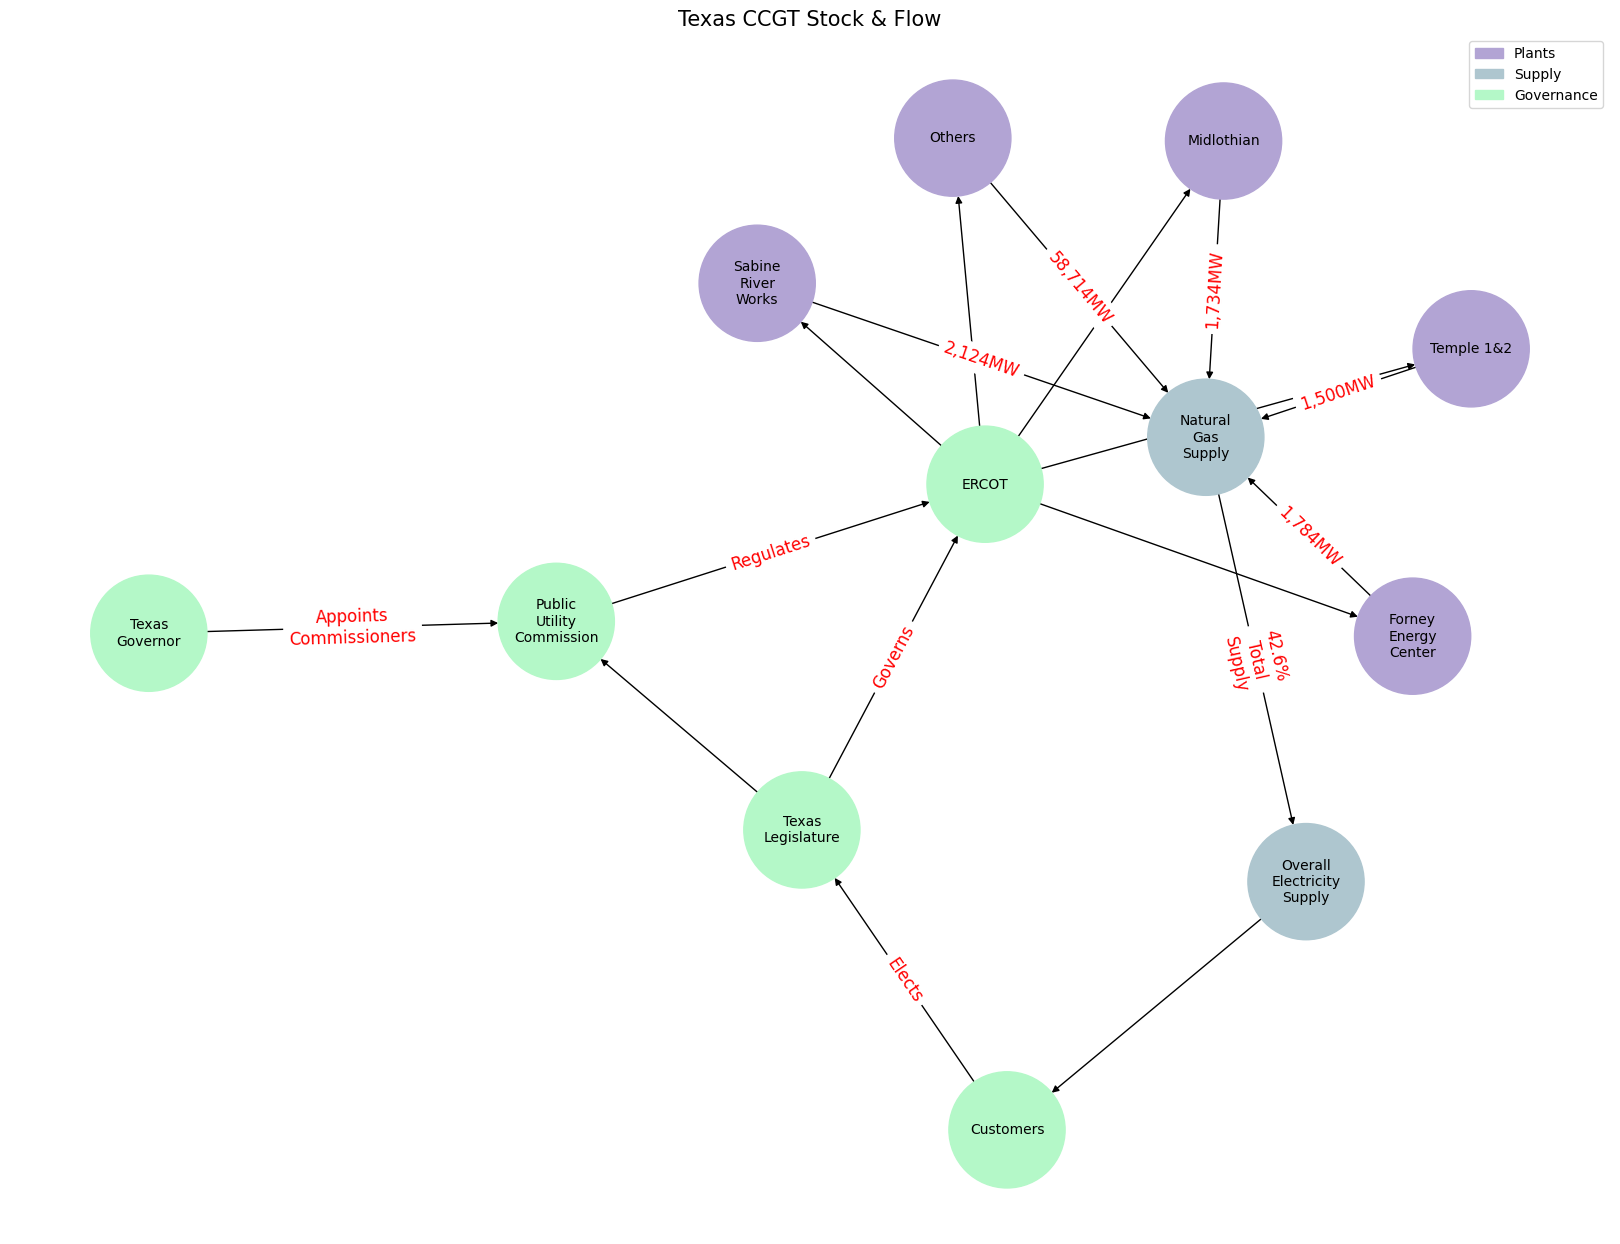

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
plants = ["Sabine\nRiver\nWorks", "Forney\nEnergy\nCenter", "Midlothian", "Temple 1&2", "Others"]
supply = ["Natural\nGas\nSupply", "Overall\nElectricity\nSupply"]
governance = ["Customers", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCommission", "Texas\nGovernor"]
nodes = plants + supply + governance
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'  
orange = "#FFD8B1"
yellow = '#FDFD96'
green = "#B4F8C8"
blue = '#AEC6CF'
indigo = '#B2A4D4'
violet = '#CB99C9'

for node in plants:
    node_colors[node] = indigo  # Production
for node in supply:
    node_colors[node] = blue  # Governance
for node in governance:
    node_colors[node] = green

colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [ 
    ("Sabine\nRiver\nWorks", "Natural\nGas\nSupply", {'label': '2,124MW'}),
    ("Forney\nEnergy\nCenter", "Natural\nGas\nSupply", {'label': '1,784MW'}),
    ("Midlothian", "Natural\nGas\nSupply", {'label': '1,734MW'}),
    ("Temple 1&2", "Natural\nGas\nSupply", {'label': '1,500MW'}),
    ("Others", "Natural\nGas\nSupply", {'label': '58,714MW'}),
    
    ("Natural\nGas\nSupply", "Overall\nElectricity\nSupply", {'label': '42.6%\nTotal\nSupply'}),
    
    ("Overall\nElectricity\nSupply", "Customers", {'label': ''}),
    ("Customers", "Texas\nLegislature", {'label': 'Elects'}),
    ("Texas\nLegislature", "ERCOT", {'label': 'Governs'}),
    ("Texas\nLegislature", "Public\nUtility\nCommission", {'label': ''}),
    ("Public\nUtility\nCommission", "ERCOT", {'label': 'Regulates'}),
    ("Texas\nGovernor","Public\nUtility\nCommission", {'label': 'Appoints\nCommissioners'}),
    
    ("ERCOT", "Sabine\nRiver\nWorks", {'label': ''}),
    ("ERCOT", "Forney\nEnergy\nCenter", {'label': ''}),
    ("ERCOT", "Midlothian", {'label': ''}),
    ("ERCOT", "Temple 1&2", {'label': ''}),
    ("ERCOT", "Others", {'label': ''}),

]

G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'

# pos = nx.spiral_layout(G)
pos = graphviz_layout(G, prog='neato')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'
labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=12)

# Create a patch (color code) for each category
indigo_patch = mpatches.Patch(color=indigo, label='Plants')
blue_patch = mpatches.Patch(color=blue, label='Supply')
green_patch = mpatches.Patch(color=green, label='Governance')

# Add legend to the plot
plt.legend(handles=[indigo_patch, blue_patch, green_patch], loc='best')

plt.title("Texas CCGT Stock & Flow", fontsize=15)
plt.savefig('../stock&flow.png', bbox_inches='tight')
plt.show()

# stock and flow = variables
# network diagram = physical infrastructure/groups
# who are the relevant threat actors in ICS compromise? surely China and Russia, but Iran and DPRK too?

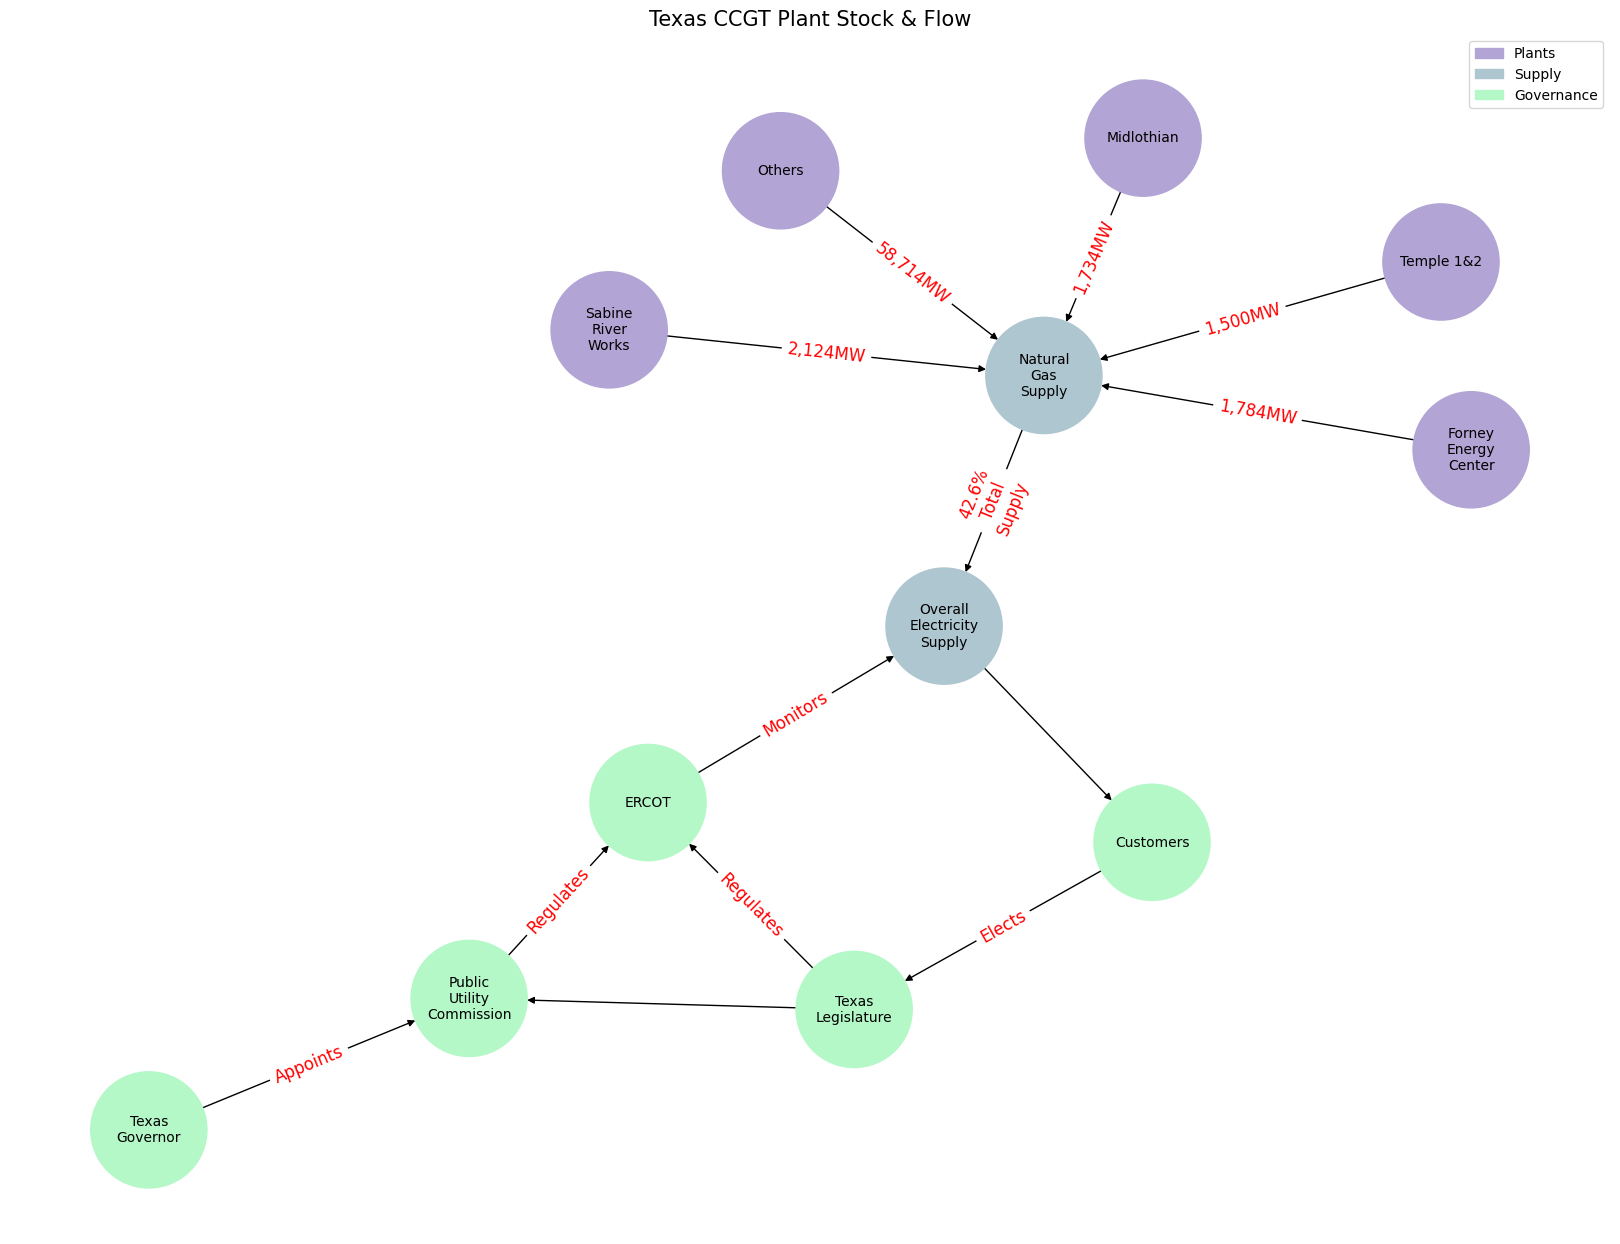

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
plants = ["Sabine\nRiver\nWorks", "Forney\nEnergy\nCenter", "Midlothian", "Temple 1&2", "Others"]
supply = ["Natural\nGas\nSupply", "Overall\nElectricity\nSupply"]
governance = ["Customers", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCommission", "Texas\nGovernor"]
nodes = plants + supply + governance
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'  
orange = "#FFD8B1"
yellow = '#FDFD96'
green = "#B4F8C8"
blue = '#AEC6CF'
indigo = '#B2A4D4'
violet = '#CB99C9'

for node in plants:
    node_colors[node] = indigo  # Production
for node in supply:
    node_colors[node] = blue  # Governance
for node in governance:
    node_colors[node] = green

colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [ 
    ("Sabine\nRiver\nWorks", "Natural\nGas\nSupply", {'label': '2,124MW'}),
    ("Forney\nEnergy\nCenter", "Natural\nGas\nSupply", {'label': '1,784MW'}),
    ("Midlothian", "Natural\nGas\nSupply", {'label': '1,734MW'}),
    ("Temple 1&2", "Natural\nGas\nSupply", {'label': '1,500MW'}),
    ("Others", "Natural\nGas\nSupply", {'label': '58,714MW'}),
    
    ("Natural\nGas\nSupply", "Overall\nElectricity\nSupply", {'label': '42.6%\nTotal\nSupply'}),
    
    ("Overall\nElectricity\nSupply", "Customers", {'label': ''}),
    ("Customers", "Texas\nLegislature", {'label': 'Elects'}),
    ("Texas\nLegislature", "ERCOT", {'label': 'Regulates'}),
    ("Texas\nLegislature", "Public\nUtility\nCommission", {'label': ''}),
    ("Public\nUtility\nCommission", "ERCOT", {'label': 'Regulates'}),
    ("Texas\nGovernor","Public\nUtility\nCommission", {'label': 'Appoints'}),
    
    ("ERCOT", "Overall\nElectricity\nSupply", {'label': 'Monitors'}),

]

G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'

# pos = nx.spiral_layout(G)
pos = graphviz_layout(G, prog='neato')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'
labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=12)

# Create a patch (color code) for each category
indigo_patch = mpatches.Patch(color=indigo, label='Plants')
blue_patch = mpatches.Patch(color=blue, label='Supply')
green_patch = mpatches.Patch(color=green, label='Governance')

# Add legend to the plot
plt.legend(handles=[indigo_patch, blue_patch, green_patch], loc='best')

plt.title("Texas CCGT Plant Stock & Flow", fontsize=15)
plt.savefig('../stock_and_flow.png', bbox_inches='tight')
plt.show()

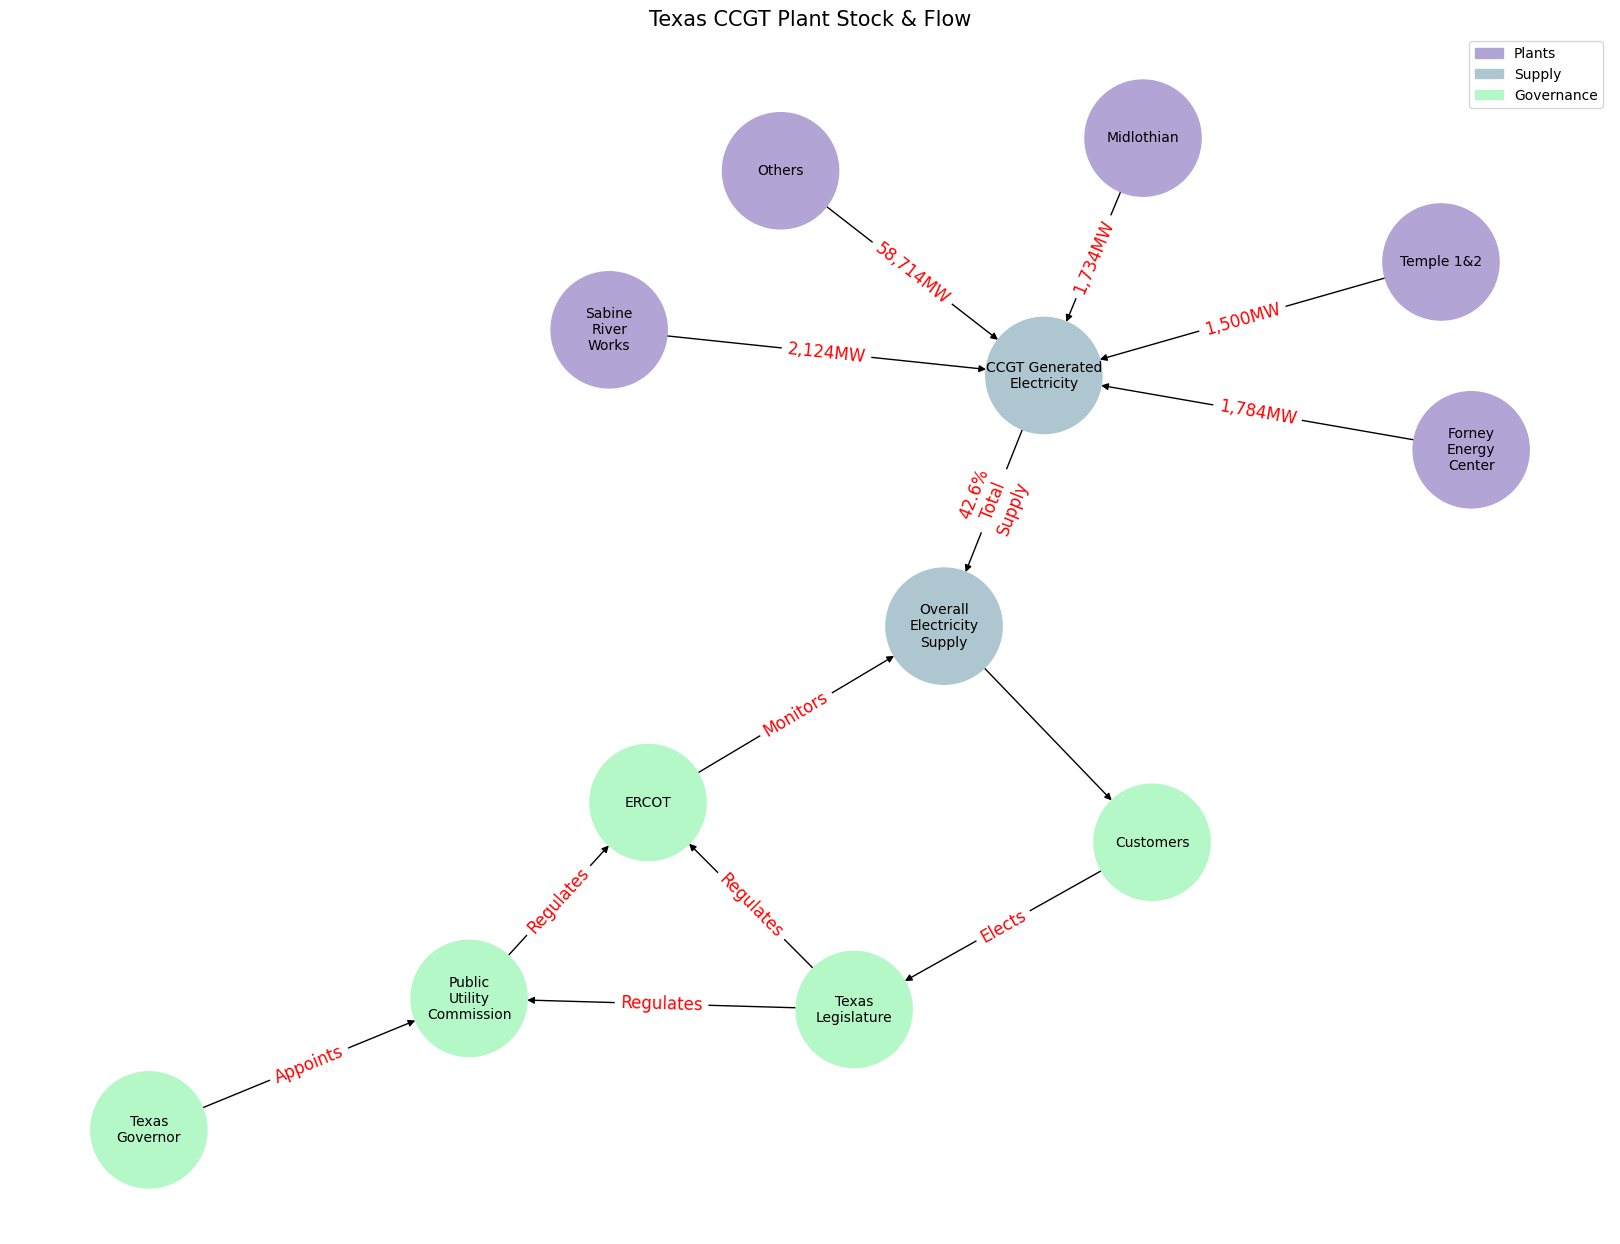

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes
plants = ["Sabine\nRiver\nWorks", "Forney\nEnergy\nCenter", "Midlothian", "Temple 1&2", "Others"]
supply = ["CCGT Generated\nElectricity", "Overall\nElectricity\nSupply"]  # Updated node name
governance = ["Customers", "ERCOT", "Texas\nLegislature", "Public\nUtility\nCommission", "Texas\nGovernor"]
nodes = plants + supply + governance
G.add_nodes_from(nodes)

# Coloring nodes
node_colors = {}
red = '#FFC0CB'
orange = "#FFD8B1"
yellow = '#FDFD96'
green = "#B4F8C8"
blue = '#AEC6CF'
indigo = '#B2A4D4'
violet = '#CB99C9'

for node in plants:
    node_colors[node] = indigo  # Production
for node in supply:
    node_colors[node] = blue  # Governance
for node in governance:
    node_colors[node] = green

colors = [node_colors[node] for node in G.nodes()]

# Adding edges
edges = [
    ("Sabine\nRiver\nWorks", "CCGT Generated\nElectricity", {'label': '2,124MW'}),
    ("Forney\nEnergy\nCenter", "CCGT Generated\nElectricity", {'label': '1,784MW'}),
    ("Midlothian", "CCGT Generated\nElectricity", {'label': '1,734MW'}),
    ("Temple 1&2", "CCGT Generated\nElectricity", {'label': '1,500MW'}),
    ("Others", "CCGT Generated\nElectricity", {'label': '58,714MW'}),

    ("CCGT Generated\nElectricity", "Overall\nElectricity\nSupply", {'label': '42.6%\nTotal\nSupply'}),

    ("Overall\nElectricity\nSupply", "Customers", {'label': ''}),
    ("Customers", "Texas\nLegislature", {'label': 'Elects'}),
    ("Texas\nLegislature", "ERCOT", {'label': 'Regulates'}),
    ("Texas\nLegislature", "Public\nUtility\nCommission", {'label': 'Regulates'}),
    ("Public\nUtility\nCommission", "ERCOT", {'label': 'Regulates'}),
    ("Texas\nGovernor", "Public\nUtility\nCommission", {'label': 'Appoints'}),

    ("ERCOT", "Overall\nElectricity\nSupply", {'label': 'Monitors'}),
]

G.add_edges_from(edges)

# Use Graphviz to layout the graph
# Here, you can choose from different Graphviz algorithms by changing 'prog'
pos = graphviz_layout(G, prog='neato')  # 'dot', 'neato', 'fdp', 'sfdp', 'twopi', 'circo'
labels = nx.get_edge_attributes(G, 'label')  # Get edge attributes

# Drawing
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=7000, edge_color='black', linewidths=1, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=12)

# Create a patch (color code) for each category
indigo_patch = mpatches.Patch(color=indigo, label='Plants')
blue_patch = mpatches.Patch(color=blue, label='Supply')
green_patch = mpatches.Patch(color=green, label='Governance')

# Add legend to the plot
plt.legend(handles=[indigo_patch, blue_patch, green_patch], loc='best')

plt.title("Texas CCGT Plant Stock & Flow", fontsize=15)
plt.savefig('../stock&flow.png', bbox_inches='tight')
plt.show()
